In [2]:
##clustal
import subprocess
import os

filename_fasta = "rbcL_angiospermae_austria.fasta"
filename_aln = "rbcL_angiospermae_austria.aln"
number_of_threads_alignement = 20


In [26]:
subprocess.run(["clustalo",  "-infile={}".format(filename_fasta), "--iterations=1", "-align" , "--threads={}".
                format(number_of_threads_alignement),
              "-outfile={}".format(filename_aln), "--outfmt=clu"])


Using 20 threads
Read 1461 sequences (type: DNA) from rbcL_angiospermae_austria.fasta
Using 110 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 1461 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress done. CPU time: 122.61u 0.48s 00:02:03.09 Elapsed: 00:01:16
mBed created 26 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)
Distance calculation within sub-clusters done. CPU time: 31.20u 0.00s 00:00:31.20 Elapsed: 00:00:17
Guide-tree computation (mBed) done.
Progressive alignment progress done. CPU time: 87.88u 22.47s 00:01:50.35 Elapsed: 00:01:32
Iteration step 1 out of 1
Computing new guide tree (iteration step 486501152)
Using 110 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 1461 sequences)
Calculating pairwise aligned identity distances...
Pairwise identity calculation progress done. CPU time: 2.74u 0.00s 00:00:02.74 Elapsed: 00:00:02
mBed creat

CompletedProcess(args=['clustalo', '-infile=rbcL_angiospermae_austria.fasta', '--iterations=1', '-align', '--threads=20', '-outfile=rbcL_angiospermae_austria.aln', '--outfmt=clu'], returncode=0)

In [5]:
from collections import Counter
from Bio import SeqIO, AlignIO

alignements = SeqIO.parse(filename_fasta, "fasta")


nucleotides = list([align.seq for align in alignements])

lengths = list(map(len, nucleotides))

print("{} sequences in total".format(len(nucleotides)))
print("max length is {}".format(max(lengths)))
print("min length is {}".format(min(lengths)))


length_before  = 0
percentage = 0
for i in range(len(nucleotides)):
    counter = Counter(nucleotides[i])
    gaps = counter['-']
    percentage += gaps/len(nucleotides[i])
    length_before += len(nucleotides[i])
length_before = length_before / len(nucleotides)

print("length before : {}".format(length_before))
print("percentage of gaps before alignement : {}".format(percentage*100))


alignements = SeqIO.parse(filename_aln, "fasta")


nucleotides = list([align.seq for align in alignements])


    
assert(len(set(map(len,nucleotides)))==1)
length_after = 0
percentage_gaps = 0
for i in range(len(nucleotides)):
    counter = Counter(nucleotides[i])
    gaps = counter['-']
    percentage_gaps += gaps/len(nucleotides[i])
    length_after += len(nucleotides[i])
length_after = length_after / len(nucleotides)
percentage_gaps /= len(nucleotides)
print("percentage of gaps after alignement : {}, with a length increase of +{}%".
      format(round(percentage_gaps*100, 2), round((length_after - length_before)*100/length_before), 2))

max length is 1000
min length is 600
1461 sequences in total
length before : 732.6680355920603
percentage of gaps before alignement : 0.0
percentage of gaps after alignement : 30.55, with a length increase of +44%


In [34]:
print("length after : {}".format(length_after))

length after : 1055.0


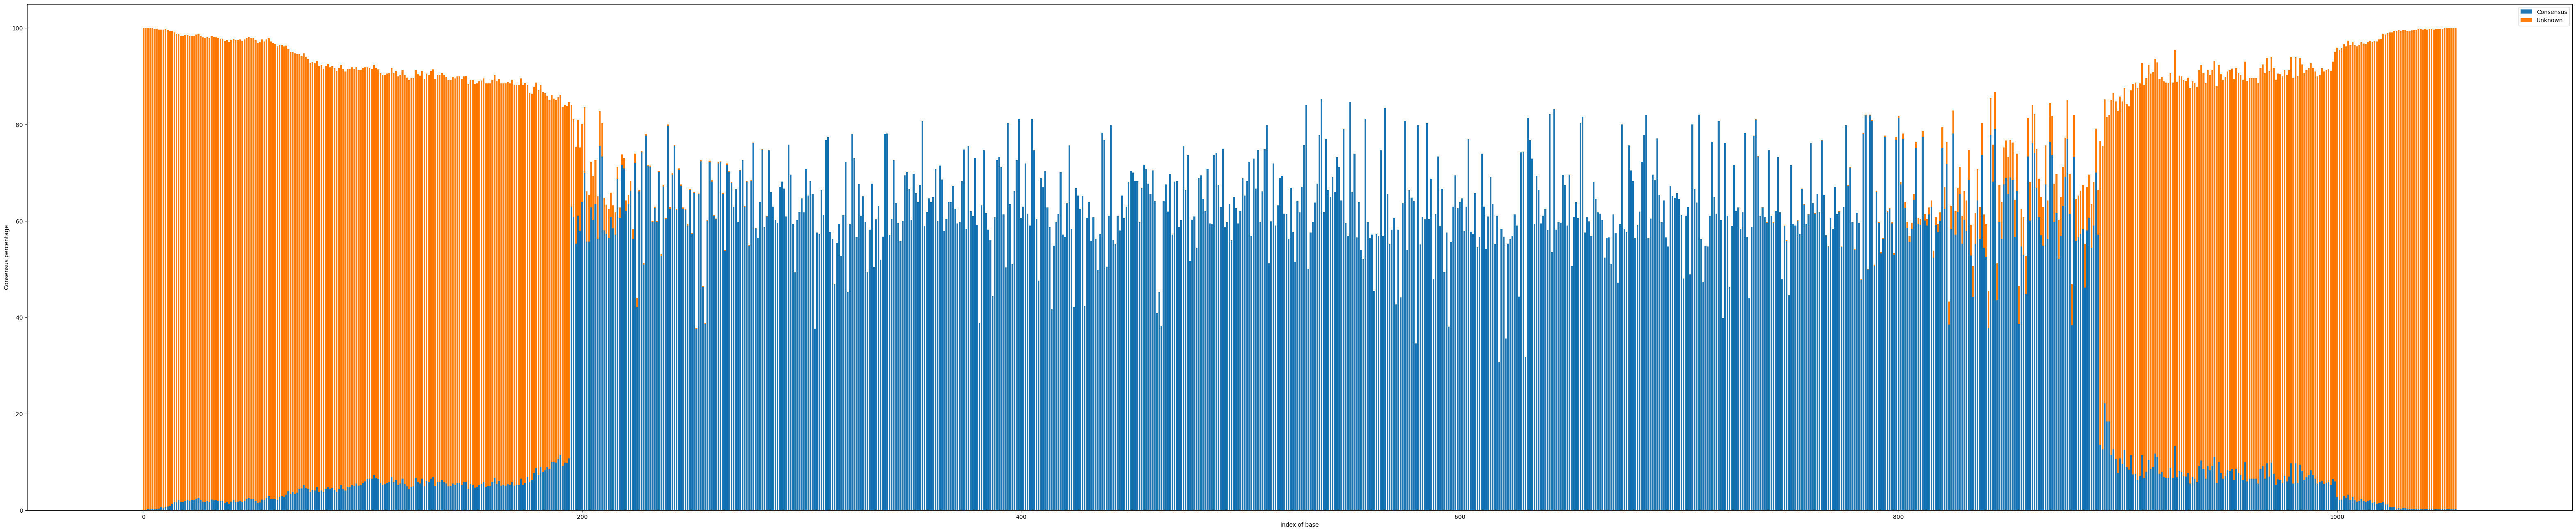

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_consensus():
    alignements = np.array(list(SeqIO.parse(filename_aln, "clustal"))).T
    sequence_length = len(alignements)
    x = []
    index = 0
    y = []
    unknowns = []
    for i in range(sequence_length):
        counts = Counter(alignements[i])
        most_common, count = counts.most_common(2)[0]
        if (most_common == "-" and count == len(alignements[i])):
            count = 0
            continue
        elif (most_common == "-"):
            most_common, count = counts.most_common(2)[1]
        x.append(index)
        index += 1
        y.append(100 * count/(len(alignements[i])))
        unknowns.append(100*counts["-"]/(len(alignements[i])))
    plt.figure(figsize=(80,16))
    plt.xlabel("index of base")
    plt.ylabel("Consensus percentage")
    plt.bar(x, y, label="Consensus")
    plt.bar(x, unknowns, bottom=y, label="Unknown")
    plt.legend()
    plt.savefig("mafft_4_2.png")
    plt.show()

plot_consensus()

In [5]:
import os
os.remove(filename_aln)

In [6]:
%%time

os.system("../mafft-linux64/mafft.bat --thread -1 --localpair --op 4.0 --ep 2.0 {} > {}".format(filename_fasta, filename_aln))

OS = linux
The number of physical cores =  4
outputhat23=0
treein = 0
compacttree = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
All-to-all alignment.
tbfast-pair (nuc) Version 7.520
alg=L, model=DNA200 (2), 2.00 (6.00), -0.10 (-0.30), noshift, amax=0.0
4 thread(s)

outputhat23=0
Loading 'hat3.seed' ... 
done.
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -4.00, +0.00, -2.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
 1450 / 1461
done.

Progressive alignment ... 
STEP  1001 /1460 (thread    3) 
Reallocating (by thread 0) ..done. *alloclen = 3002
STEP  1401 /1460 (thread    2) 
Reallocating (by thread 1) ..done. *alloclen = 4064

done.
tbfast (nuc) Version 7.520
alg=A, model=DNA200 (2), 4.00 (12.00), 2.00 (6.00), noshift, amax=0.0
4 thread(s)


Strategy:
 L-INS-1 (Not tested.)
 Progressive method incorporating LOCAL pairwise alignment information

If unsure which option to use, try 'mafft --auto input

CPU times: user 555 ms, sys: 282 ms, total: 838 ms
Wall time: 28min 27s


0

In [ ]:
##gap percentage, length added in average
## clustalo 1 iterations -> 50.26, +101%
##mafft --op 2.0 --ep 1.0 -> 73.94, +303%
##mafft --op 1.0 --ep 0.5 -> 75.62, +310%
##mafft --op 4.0 --ep 2.0 -> 72.44, +263%
##mafft --op 40.0 --ep 20.0 -> 53.09, +113%
##mafft --op 400.0 --ep 200.0 -> 30.55, +44%

#and blastn, minimap but not all to all, just pairwise

#test muscle + augmenter au max tolérance erreurs : done !!
#regarder longueur moyenne clusters (moyenne, variance) : done, on voit que les clusters sont très très proches en longueur !!

#essayer primalscheme sur clusters non alignés (amplicon size versus coverage)
#essayer d'aligner que le début et que la fin des séquences (varier, d'abord 0-150, 10-160)


#résumé :
#alignement ne fonctionne pas bien car trop de différences entre les séquences -> 
####faire des clusters avant l'alignement et prendre les 3 plus grands, on voit que les clusters ont sensiblement la même taille
#essai d'améliorer alignement sequence -> clustal, mafft
#montrer différence entre "meilleur mafft - plus 'faux'" et "clustal classique"
#essai de primalscheme, question : better to use on non aligned sequences or align first

In [44]:
import regex

# def regex_with_mismatches(input_string, allowed_mismatches=2):
#     pattern = f"(?:{input_string}|"
#     for i in range(allowed_mismatches):
#         pattern += f"(?e)({'|'.join([f'{input_string[:j]}[ACTG]{{e<={i}}}{input_string[j+1:]}' for j in range(len(input_string))])})|"
#     pattern = pattern[:-1] + ")"
#     return pattern

# Example usage:
input_string = "ACGTACGTACGT"
allowed_mismatches = 1
your_sequence = "AGTTACGTACGTAA"

regex_pattern = regex_with_mismatches(input_string, allowed_mismatches)

m=regex.findall("(AA){e<=1}", "CAAG") # means allow up to 1 error
matched = regex.findall("(" + input_string + "){s<=" + str(allowed_mismatches) + "}", your_sequence)
if matched:
    print("Sequence matches with up to 2 mismatches.")
else:
    print("No match found.")


No match found.


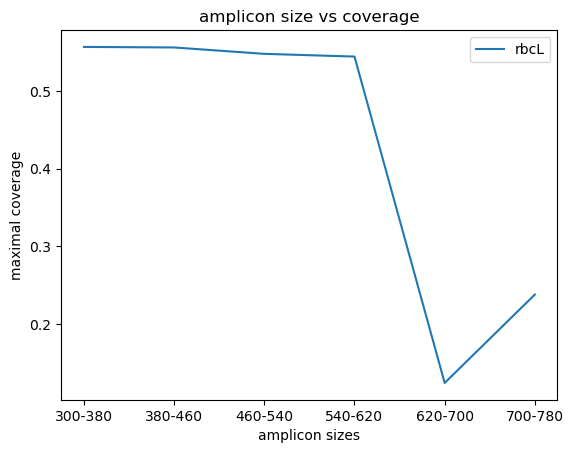

In [9]:
import matplotlib.pyplot as plt
#creating plots
plt.title("amplicon size vs coverage")
plt.xlabel("amplicon sizes")
plt.ylabel("maximal coverage")
plt.plot(["300-380", "380-460", "460-540", "540-620", "620-700", "700-780"], [0.5565, 0.5558, 0.5476, 0.5441, 0.1246, 0.2382], label="rbcL")
plt.legend()
plt.savefig("amplicon size.png")
plt.show()

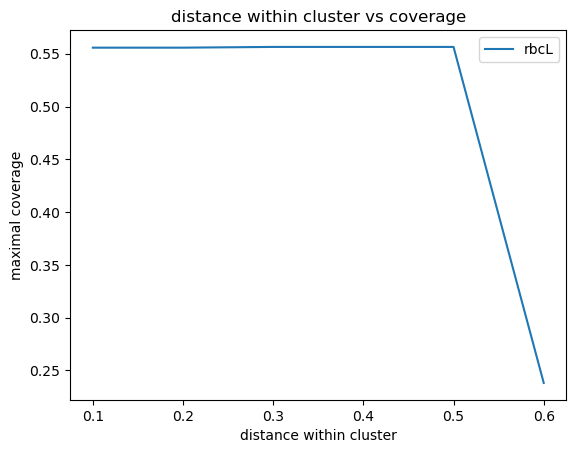

In [5]:
import matplotlib.pyplot as plt
#creating plots
plt.title("distance within cluster vs coverage")
plt.xlabel("distance within cluster")
plt.ylabel("maximal coverage")
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], [0.5558, 0.5558, 0.5565, 0.5565, 0.5565, 0.2382], label="rbcL")
plt.legend()
plt.savefig("distance within cluster.png")
plt.show()

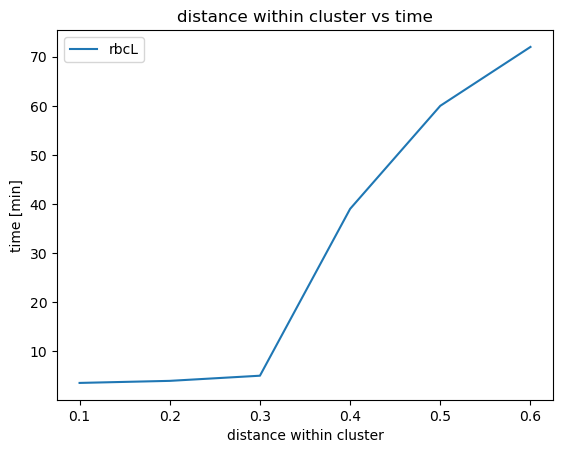

In [8]:
#creating plots
plt.title("distance within cluster vs time")
plt.xlabel("distance within cluster")
plt.ylabel("time [min]")
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], [3.53, 3.95, 5, 39, 60, 72], label="rbcL")
plt.legend()
plt.savefig("distance vs time")
plt.show()